In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("proj4.ipynb")

In this part we'll do some Mongo exploration and aggregations + text flags.

In [3]:
import pickle
import pandas as pd
import pymongo
from pymongo import TEXT
import numpy as np

myclient = pymongo.MongoClient("mongodb://localhost")
mydb = myclient["yelp"]
business = mydb["business"]
review = mydb["review"]
user = mydb["user"]

In [5]:
import zipfile
import os.path

if not os.path.isfile('data/yelp_academic_dataset_review.json'):
    with zipfile.ZipFile('data/yelp_academic_dataset_review.json.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

if not os.path.isfile('data/yelp_academic_dataset_user.json'):
    with zipfile.ZipFile('data/yelp_academic_dataset_user.json.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

if not os.path.isfile('data/yelp_academic_dataset_business.json'):
    with zipfile.ZipFile('data/yelp_academic_dataset_business.json.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

In [6]:
import json

if business.count_documents({}) == 0:
    print("Loading business collection...")
    with open('data/yelp_academic_dataset_business.json', encoding='utf-8') as f:
        for line in f:
            business.insert_one(json.loads(line))

if review.count_documents({}) == 0:
    print("Loading review collection...")
    with open('data/yelp_academic_dataset_review.json', encoding='utf-8') as f:
        for line in f:
            review.insert_one(json.loads(line))
            
if user.count_documents({}) == 0:
    print("Loading user collection...")
    with open('data/yelp_academic_dataset_user.json', encoding='utf-8') as f:
        for line in f:
            user.insert_one(json.loads(line))

In [7]:
user.count_documents({})

1000

In [8]:
business.find_one()

{'_id': ObjectId('6737c377ed849dc4d5aec165'),
 'business_id': '6iYb2HFDywm3zjuRg0shjw',
 'name': 'Oskar Blues Taproom',
 'address': '921 Pearl St',
 'city': 'Boulder',
 'state': 'CO',
 'postal_code': '80302',
 'latitude': 40.0175444,
 'longitude': -105.2833481,
 'stars': 4.0,
 'review_count': 86,
 'is_open': 1,
 'attributes': {'RestaurantsTableService': 'True',
  'WiFi': "u'free'",
  'BikeParking': 'True',
  'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
  'BusinessAcceptsCreditCards': 'True',
  'RestaurantsReservations': 'False',
  'WheelchairAccessible': 'True',
  'Caters': 'True',
  'OutdoorSeating': 'True',
  'RestaurantsGoodForGroups': 'True',
  'HappyHour': 'True',
  'BusinessAcceptsBitcoin': 'False',
  'RestaurantsPriceRange2': '2',
  'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}",
  'HasTV': 'Tr

In [10]:
review.find_one()

{'_id': ObjectId('6737c3b2ed849dc4d5b134ae'),
 'review_id': 'lWC-xP3rd6obsecCYsGZRg',
 'user_id': 'ak0TdVmGKo4pwqdJSTLwWw',
 'business_id': 'buF9druCkbuXLX526sGELQ',
 'stars': 4.0,
 'useful': 3,
 'funny': 1,
 'cool': 1,
 'text': "Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. \n\nAfter reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tagliatelle 

In [12]:
import pickle
import pandas as pd

In [13]:
sample_document = business.find_one()
sample_document

{'_id': ObjectId('6737c377ed849dc4d5aec165'),
 'business_id': '6iYb2HFDywm3zjuRg0shjw',
 'name': 'Oskar Blues Taproom',
 'address': '921 Pearl St',
 'city': 'Boulder',
 'state': 'CO',
 'postal_code': '80302',
 'latitude': 40.0175444,
 'longitude': -105.2833481,
 'stars': 4.0,
 'review_count': 86,
 'is_open': 1,
 'attributes': {'RestaurantsTableService': 'True',
  'WiFi': "u'free'",
  'BikeParking': 'True',
  'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
  'BusinessAcceptsCreditCards': 'True',
  'RestaurantsReservations': 'False',
  'WheelchairAccessible': 'True',
  'Caters': 'True',
  'OutdoorSeating': 'True',
  'RestaurantsGoodForGroups': 'True',
  'HappyHour': 'True',
  'BusinessAcceptsBitcoin': 'False',
  'RestaurantsPriceRange2': '2',
  'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}",
  'HasTV': 'Tr

In [14]:
sample_document = business.find_one({'city': 'Atlanta'})
print(sample_document)

{'_id': ObjectId('6737c377ed849dc4d5aec169'), 'business_id': 'PE9uqAjdw0E4-8mjGl3wVA', 'name': 'Crossfit Terminus', 'address': '1046 Memorial Dr SE', 'city': 'Atlanta', 'state': 'GA', 'postal_code': '30316', 'latitude': 33.7470274, 'longitude': -84.3534244, 'stars': 4.0, 'review_count': 14, 'is_open': 1, 'attributes': {'GoodForKids': 'False', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}", 'BusinessAcceptsCreditCards': 'True'}, 'categories': 'Gyms, Active Life, Interval Training Gyms, Fitness & Instruction', 'hours': {'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0', 'Wednesday': '16:0-19:0', 'Thursday': '16:0-19:0', 'Friday': '16:0-19:0', 'Saturday': '9:0-11:0'}}


In [15]:
sample_document = business.find_one({'city': 'Boston', 'address': '100 Huntington Ave', 'name': 'Legal Sea Foods'})
sample_document

{'_id': ObjectId('6737c38ded849dc4d5af8b5d'),
 'business_id': 'Rr7rhulFCpGvO341g-EWVg',
 'name': 'Legal Sea Foods',
 'address': '100 Huntington Ave',
 'city': 'Boston',
 'state': 'MA',
 'postal_code': '02116',
 'latitude': 42.3471447,
 'longitude': -71.0773777,
 'stars': 3.5,
 'review_count': 570,
 'is_open': 1,
 'attributes': {'BusinessAcceptsCreditCards': 'True',
  'RestaurantsGoodForGroups': 'True',
  'OutdoorSeating': 'False',
  'BusinessParking': "{'garage': True, 'street': True, 'validated': True, 'lot': False, 'valet': False}",
  'RestaurantsAttire': "'casual'",
  'Caters': 'False',
  'NoiseLevel': "u'average'",
  'RestaurantsPriceRange2': '3',
  'RestaurantsReservations': 'True',
  'WiFi': "u'no'",
  'Alcohol': "'full_bar'",
  'GoodForKids': 'True',
  'BikeParking': 'False',
  'BYOBCorkage': 'None',
  'RestaurantsTakeOut': 'True',
  'WheelchairAccessible': 'True',
  'DogsAllowed': 'False',
  'HasTV': 'True',
  'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False

In [19]:
list(business.find({"state": "CA"}).limit(3))

[{'_id': ObjectId('6737c377ed849dc4d5aec880'),
  'business_id': 'SNCRnaSy6E5fHgQuoCmmbQ',
  'name': 'Katia Photography',
  'address': '',
  'city': 'Portland',
  'state': 'CA',
  'postal_code': '97007',
  'latitude': 45.4501529,
  'longitude': -122.8849111,
  'stars': 5.0,
  'review_count': 11,
  'is_open': 1,
  'attributes': {'BusinessAcceptsBitcoin': 'False',
   'BusinessAcceptsCreditCards': 'True',
   'WiFi': "u'no'"},
  'categories': 'Shopping, Clothing Rental, Event Planning & Services, Fashion, Event Photography, Photographers, Session Photography',
  'hours': {'Monday': '8:0-22:0',
   'Tuesday': '8:0-22:0',
   'Wednesday': '8:0-22:0',
   'Thursday': '8:0-22:0',
   'Friday': '8:0-22:0',
   'Saturday': '8:0-22:0',
   'Sunday': '8:0-22:0'}},
 {'_id': ObjectId('6737c383ed849dc4d5af38ec'),
  'business_id': 'cjwnQMQOGOYgB5uNmiYWLA',
  'name': 'Verizon Authorized Retailer - GoWireless',
  'address': '4655 SW Griffith Dr, Ste 125',
  'city': 'Beaverton',
  'state': 'CA',
  'postal_code'

In [20]:
result_1b = list(business.aggregate([
{ '$match': {
    'review_count': { '$gte': 30 },
    'latitude': {'$gte': 37, '$lte': 41}, 
    'longitude': {'$gte': -109, '$lte': -102}

} },
  { '$group': {    '_id': None,

    'average_star_rating': { '$avg': '$stars'} }
  }
]))[0]['average_star_rating']
result_1b

3.6735412474849096

In [23]:
q1c_pipeline = list(business.aggregate([
    {'$group': {
        '_id': {'city': '$city', 'state': '$state'}, 
        'count': {'$sum': '$review_count'}, 
         'average_stars' : {'$avg': '$stars'},
    }
        
    }, 

    {'$match': {
        'count': {'$gte': 5.0}
    }}, 

    {'$group': {
        '_id': '$_id.state', 
        'average_stars': {'$max': '$average_stars'}, 
        'city_state': {'$first': {'$concat': ['$_id.city', ',', '$_id.state']}}
    }}, 

    {'$project': {
        '_id': 0, 
        'average_stars': 1, 
        'city_state': 1
    }}, 
    {'$sort': {
        'average_stars': -1, 
        'city_state' : 1
    }}

]))
result_1c = q1c_pipeline
result_1c

[{'average_stars': 5.0, 'city_state': 'Brookline,MA'},
 {'average_stars': 5.0, 'city_state': 'Burnaby,ON'},
 {'average_stars': 5.0, 'city_state': 'Castle Rock,WA'},
 {'average_stars': 5.0, 'city_state': 'Harmony,FL'},
 {'average_stars': 5.0, 'city_state': 'Irvine,CA'},
 {'average_stars': 5.0, 'city_state': 'Kings County,NY'},
 {'average_stars': 5.0, 'city_state': 'Orange,OH'},
 {'average_stars': 5.0, 'city_state': 'Point,GA'},
 {'average_stars': 5.0, 'city_state': 'Port Moody,BC'},
 {'average_stars': 5.0, 'city_state': 'Vancouver,DC'},
 {'average_stars': 5.0, 'city_state': 'austin,TX'},
 {'average_stars': 5.0, 'city_state': 'portland,OR'},
 {'average_stars': 4.5, 'city_state': 'Lousville,CO'},
 {'average_stars': 4.5, 'city_state': 'Portland,HI'},
 {'average_stars': 4.5, 'city_state': 'Powell,DE'},
 {'average_stars': 4.5, 'city_state': 'Salem,AZ'},
 {'average_stars': 4.5, 'city_state': 'Vancouver,ABE'},
 {'average_stars': 4.0, 'city_state': 'Franklin Park,IL'},
 {'average_stars': 4.0, '

In [26]:

if 'text_text' not in review.index_information():
    review.create_index([('text', TEXT)])
    

result_1d = len(list(review.find( { '$text': { '$search': "disgusting horrible horrid gross bad hate"}})))
result_1d

728

In [29]:
review_boolean = mydb["review_boolean"]
review_boolean.drop()

if 'text_text' not in review_boolean.index_information():
    review_boolean.create_index([('text', TEXT)])


review_boolean.insert_many( mydb["review"].find())

review_boolean.update_many({'$text': { '$search': "disgusting horrible horrid gross bad hate"}}, {'$set': {'to_avoid': 'true'}})
review_boolean.update_many({'to_avoid': {'$exists': False}}, {'$set': {'to_avoid': 'false'}})


In [30]:
review_boolean = mydb["review_boolean"]
review_boolean.find_one()

{'_id': ObjectId('6737c3b2ed849dc4d5b134ae'),
 'review_id': 'lWC-xP3rd6obsecCYsGZRg',
 'user_id': 'ak0TdVmGKo4pwqdJSTLwWw',
 'business_id': 'buF9druCkbuXLX526sGELQ',
 'stars': 4.0,
 'useful': 3,
 'funny': 1,
 'cool': 1,
 'text': "Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. \n\nAfter reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tagliatelle 

In [33]:
with_avoid = mydb.command("collstats", "review_boolean")['size']

review_boolean.update_many({}, {'$unset': {'to_avoid': ''}})


without_avoid = mydb.command("collstats", "review_boolean")['size']
difference = with_avoid - without_avoid
difference

149272

In [ ]:
ize']
difference = with_avoid - without_avoid
difference

In [36]:
list(business.find({}).limit(2))

[{'_id': ObjectId('6737c377ed849dc4d5aec165'),
  'business_id': '6iYb2HFDywm3zjuRg0shjw',
  'name': 'Oskar Blues Taproom',
  'address': '921 Pearl St',
  'city': 'Boulder',
  'state': 'CO',
  'postal_code': '80302',
  'latitude': 40.0175444,
  'longitude': -105.2833481,
  'stars': 4.0,
  'review_count': 86,
  'is_open': 1,
  'attributes': {'RestaurantsTableService': 'True',
   'WiFi': "u'free'",
   'BikeParking': 'True',
   'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
   'BusinessAcceptsCreditCards': 'True',
   'RestaurantsReservations': 'False',
   'WheelchairAccessible': 'True',
   'Caters': 'True',
   'OutdoorSeating': 'True',
   'RestaurantsGoodForGroups': 'True',
   'HappyHour': 'True',
   'BusinessAcceptsBitcoin': 'False',
   'RestaurantsPriceRange2': '2',
   'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casua

SQL to do further exploration. SQL vs Mongo joins on Yelp reviews/business.

In [37]:
%reload_ext sql
%sql postgresql://jovyan@127.0.0.1:5432/postgres

!psql -h localhost -c 'DROP DATABASE IF EXISTS yelp'
!psql -h localhost -c 'CREATE DATABASE yelp'
!psql -h localhost -d yelp -c 'DROP TABLE IF EXISTS reviews'
!psql -h localhost -d yelp -c 'CREATE TABLE reviews(data TEXT);'
!cat data/yelp_academic_dataset_review.json | psql -h localhost -d yelp -c "COPY reviews (data) FROM STDIN;"
%sql \l

There's a new jupysql version available (0.10.16), you're running 0.10.0. To upgrade: pip install jupysql --upgrade
DROP DATABASE
CREATE DATABASE
NOTICE:  table "reviews" does not exist, skipping
DROP TABLE
CREATE TABLE
COPY 7500


Running query in 'postgresql://jovyan@127.0.0.1:5432/postgres'

Name,Owner,Encoding,Collate,Ctype,Access privileges
baseball,jovyan,UTF8,en_US.utf8,en_US.utf8,None
billboard,jovyan,UTF8,en_US.utf8,en_US.utf8,None
imdb,jovyan,UTF8,en_US.utf8,en_US.utf8,None
imdb_lecture,jovyan,UTF8,en_US.utf8,en_US.utf8,None
jovyan,jovyan,UTF8,en_US.utf8,en_US.utf8,None
postgres,jovyan,UTF8,en_US.utf8,en_US.utf8,None
template0,jovyan,UTF8,en_US.utf8,en_US.utf8,=c/jovyanjovyan=CTc/jovyan
template1,jovyan,UTF8,en_US.utf8,en_US.utf8,=c/jovyanjovyan=CTc/jovyan
ucb_buildings,jovyan,UTF8,en_US.utf8,en_US.utf8,None
yelp,jovyan,UTF8,en_US.utf8,en_US.utf8,None


Now, run the following cell to connect to the Postgres Yelp database. There should be no errors after running the following cell.

In [38]:
%sql postgresql://jovyan@127.0.0.1:5432/yelp

Connecting and switching to connection postgresql://jovyan@127.0.0.1:5432/yelp

Run the following cell to observe how this new `reviews` table looks. Note that the `data` column is stored as TEXT and not as JSON.

In [39]:
%%sql
SELECT * FROM reviews LIMIT 2;

Running query in 'postgresql://jovyan@127.0.0.1:5432/yelp'

2 rows affected.

data
"{""review_id"":""lWC-xP3rd6obsecCYsGZRg"",""user_id"":""ak0TdVmGKo4pwqdJSTLwWw"",""business_id"":""buF9druCkbuXLX526sGELQ"",""stars"":4.0,""useful"":3,""funny"":1,""cool"":1,""text"":""Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. After reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tagliatelle bolognese and a four cheese filled pasta in a creamy sauce with bacon, asparagus and grana frita. Both were very good. We split a secondi which was the special Berkshire pork secreto, which was described as a pork skirt steak with garlic potato purée and romanesco broccoli (incorrectly described as a romanesco sauce). Some tables received bread before the meal but for some reason we did not. Management also seems capable for when the tenants in the apartment above began playing basketball she intervened and also comped the tables a dessert. We ordered the apple dumpling with gelato and it was also quite tasty. Portions are not huge which I particularly like because I prefer to order courses. If you are someone who orders just a meal you may leave hungry depending on you appetite. Dining room was mostly younger crowd while the bar was definitely the over 40 set. Would recommend that the naysayers return to see the improvement although I personally don't know the former glory to be able to compare. Easy access to downtown Salem without the crowds on this month of October."",""date"":""2014-10-11 03:34:02""}"
"{""review_id"":""8bFej1QE5LXp4O05qjGqXA"",""user_id"":""YoVfDbnISlW0f7abNQACIg"",""business_id"":""RA4V8pr014UyUbDvI-LW2A"",""stars"":4.0,""useful"":1,""funny"":0,""cool"":0,""text"":""This store is pretty good. Not as great as Walmart (or my preferred, Milford Target), but closer and in a easier area to get to. The store itself is pretty clean and organized, the staff are friendly (most of the time), and BEST of all is the Self Checkout this store has! Great clearance sections throughout, and great prices on everything in the store, in general (they pricematch too!). Christian, Debbie, Jen and Hanna are all very friendly, helpful, sensitive to all customer needs. Definitely one of the better Target locations in the area, and they do a GREAT job assisting customers for being such a busy store. Located directly in the Framingham Mall on Cochituate Rd / Route 30. 4 stars."",""date"":""2015-07-03 20:38:25""}"


In [40]:
%%sql --save query_2b result_2b <<
SELECT 
    b.values ->>'review_id' AS review_id, 
    b.values ->>'user_id' AS user_id, 
    b.values ->>'business_id' AS business_id, 
    b.values ->>'stars' AS stars, 
    b.values ->>'useful' AS useful, 
    b.values ->>'funny' AS funny, 
    b.values ->>'cool' AS cool, 
    b.values ->>'text' AS text
    
FROM (SELECT CAST(regexp_replace(data, E'[\\n\\r]+', '','g') AS JSON) AS values FROM reviews) AS b
ORDER BY review_id
LIMIT 10;

Running query in 'postgresql://jovyan@127.0.0.1:5432/yelp'

10 rows affected.

In [43]:
!psql -h localhost -d yelp -c 'DROP TABLE IF EXISTS business_complete'
!psql -h localhost -d yelp -c 'CREATE TABLE business_complete(business_id TEXT PRIMARY KEY, name TEXT, address TEXT, city TEXT, state TEXT, postal_code TEXT, latitude TEXT,longitude TEXT, stars TEXT, review_count TEXT, is_open TEXT, attributes TEXT, categories TEXT, hours TEXT);'
!psql -h localhost -d yelp -c 'DROP TABLE IF EXISTS review_complete'
!psql -h localhost -d yelp -c 'CREATE TABLE review_complete(review_id TEXT PRIMARY KEY, user_id TEXT, business_id TEXT, stars TEXT, useful TEXT, funny TEXT, cool TEXT,text TEXT);'
!cat data/business.csv | psql -h localhost -d yelp -c "COPY business_complete (business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours) FROM STDIN CSV HEADER;"
!cat data/review.csv | psql -h localhost -d yelp -c "COPY review_complete (review_id, user_id, business_id, stars, useful, funny, cool, text) FROM STDIN CSV HEADER;"

NOTICE:  table "business_complete" does not exist, skipping
DROP TABLE
CREATE TABLE
NOTICE:  table "review_complete" does not exist, skipping
DROP TABLE
CREATE TABLE
COPY 35
COPY 7500


Let's take a look at how `review_complete` looks.

In [44]:
%%sql
SELECT * FROM review_complete LIMIT 1;

Running query in 'postgresql://jovyan@127.0.0.1:5432/yelp'

1 rows affected.

review_id,user_id,business_id,stars,useful,funny,cool,text
lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,"Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. After reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tagliatelle bolognese and a four cheese filled pasta in a creamy sauce with bacon, asparagus and grana frita. Both were very good. We split a secondi which was the special Berkshire pork secreto, which was described as a pork skirt steak with garlic potato purée and romanesco broccoli (incorrectly described as a romanesco sauce). Some tables received bread before the meal but for some reason we did not. Management also seems capable for when the tenants in the apartment above began playing basketball she intervened and also comped the tables a dessert. We ordered the apple dumpling with gelato and it was also quite tasty. Portions are not huge which I particularly like because I prefer to order courses. If you are someone who orders just a meal you may leave hungry depending on you appetite. Dining room was mostly younger crowd while the bar was definitely the over 40 set. Would recommend that the naysayers return to see the improvement although I personally don't know the former glory to be able to compare. Easy access to downtown Salem without the crowds on this month of October."


In [45]:
%%sql
SELECT * FROM business_complete LIMIT 1;

Running query in 'postgresql://jovyan@127.0.0.1:5432/yelp'

1 rows affected.

business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
extrX1RLZEOq6VXN5SvnTw,Fiskie's Cafe,27 Harbor Point Blvd,Dorchester,MA,02125,42.318905,-71.042273,3.5,32,1,"{""BikeParking"":""False"",""NoiseLevel"":""u'average'"",""Ambience"":""{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}"",""BusinessAcceptsBitcoin"":""False"",""Alcohol"":""u'none'"",""RestaurantsAttire"":""u'casual'"",""RestaurantsPriceRange2"":""2"",""WiFi"":""u'no'"",""OutdoorSeating"":""True"",""RestaurantsTakeOut"":""True"",""RestaurantsDelivery"":""True"",""Caters"":""True"",""GoodForKids"":""True"",""RestaurantsReservations"":""None"",""GoodForMeal"":""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': True, 'breakfast': False}"",""RestaurantsGoodForGroups"":""True"",""HasTV"":""False"",""BusinessAcceptsCreditCards"":""True"",""BusinessParking"":""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}""}","Burgers, American (Traditional), Asian Fusion, Chinese, Restaurants, Mediterranean","{""Monday"":""11:0-21:0"",""Tuesday"":""11:0-21:0"",""Wednesday"":""11:0-21:0"",""Thursday"":""11:0-21:0"",""Friday"":""11:0-21:0"",""Saturday"":""11:0-20:0"",""Sunday"":""11:0-20:0""}"


In [46]:
result_2c_str = 'SELECT * FROM  review_complete LEFT JOIN business_complete ON review_complete.business_id = business_complete.business_id;'
!psql -h localhost -d yelp -c "explain analyze $result_2c_str"

                                                         QUERY PLAN                                                          
-----------------------------------------------------------------------------------------------------------------------------
 Hash Left Join  (cost=13.82..778.08 rows=15792 width=704) (actual time=0.067..3.785 rows=7500 loops=1)
   Hash Cond: (review_complete.business_id = business_complete.business_id)
   ->  Seq Scan on review_complete  (cost=0.00..721.92 rows=15792 width=256) (actual time=0.004..2.118 rows=7500 loops=1)
   ->  Hash  (cost=11.70..11.70 rows=170 width=448) (actual time=0.047..0.049 rows=35 loops=1)
         Buckets: 1024  Batches: 1  Memory Usage: 32kB
         ->  Seq Scan on business_complete  (cost=0.00..11.70 rows=170 width=448) (actual time=0.002..0.015 rows=35 loops=1)
 Planning Time: 0.529 ms
 Execution Time: 4.062 ms
(8 rows)



Now, let's perform the equivalent left join in Mongo between `review` and `business`. **The output array field should be named as `business_info`**. Feel free to refer to the `$lookup` [documentation](https://docs.mongodb.com/manual/reference/operator/aggregation/lookup/).

**Note:** You will provide a single-stage pipeline to `review.aggregate(...)` as your solution. Save your pipeline to `q2c_pipeline`.

In [47]:
business.create_index('business_id', unique=True)

q2c_pipeline = [{'$lookup': {'from': 'business_complete', 'localField': 'business_id', 'foreignField': 'business_id', 'as': 'business_info'}}]

result_2c = list(review.aggregate(q2c_pipeline))[:5]
result_2c

[{'_id': ObjectId('6737c3b2ed849dc4d5b134ae'),
  'review_id': 'lWC-xP3rd6obsecCYsGZRg',
  'user_id': 'ak0TdVmGKo4pwqdJSTLwWw',
  'business_id': 'buF9druCkbuXLX526sGELQ',
  'stars': 4.0,
  'useful': 3,
  'funny': 1,
  'cool': 1,
  'text': "Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. \n\nAfter reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tag

In [50]:
mydb.command('explain', {'aggregate': 'review', 'pipeline': q2c_pipeline, 'cursor': {}}, verbosity='executionStats')

{'explainVersion': '1',
 'stages': [{'$cursor': {'queryPlanner': {'namespace': 'yelp.review',
     'indexFilterSet': False,
     'parsedQuery': {},
     'queryHash': '8B3D4AB8',
     'planCacheKey': 'D542626C',
     'maxIndexedOrSolutionsReached': False,
     'maxIndexedAndSolutionsReached': False,
     'maxScansToExplodeReached': False,
     'winningPlan': {'stage': 'COLLSCAN', 'direction': 'forward'},
     'rejectedPlans': []},
    'executionStats': {'executionSuccess': True,
     'nReturned': 7500,
     'executionTimeMillis': 99,
     'totalKeysExamined': 0,
     'totalDocsExamined': 7500,
     'executionStages': {'stage': 'COLLSCAN',
      'nReturned': 7500,
      'executionTimeMillisEstimate': 0,
      'works': 7502,
      'advanced': 7500,
      'needTime': 1,
      'needYield': 0,
      'saveState': 10,
      'restoreState': 10,
      'isEOF': 1,
      'direction': 'forward',
      'docsExamined': 7500}}},
   'nReturned': 7500,
   'executionTimeMillisEstimate': 4},
  {'$lookup':

For this part we'll sample into pandas and analyzing missing attributes.

In [51]:
business_trunc = mydb["business_trunc"]
business_trunc.drop()
count = 0
for document in business.find({}):
    business_trunc.insert_one(document)
    count += 1
    if count == 1000:
        break

business_cursor = business_trunc.find({})
review_cursor = mydb["reviews"].find({})
user_cursor = mydb["users"].find({})

from pandas import json_normalize
user_df = json_normalize(user_cursor)
review_df = json_normalize(review_cursor)
business_df = json_normalize(business_cursor)

For the rest of Question 3, please use the three dataframes we just created: `user_df`, `review_df`, and `business_df`. Let's take a look at the first five rows of `business_df`.

In [52]:
business_df.head(25)

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,attributes.GoodForDancing,attributes.BestNights,attributes.Music,attributes.BYOB,attributes.CoatCheck,attributes.Smoking,attributes.DriveThru,attributes.BYOBCorkage,attributes.Corkage,attributes.RestaurantsCounterService
0,6737c377ed849dc4d5aec165,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6737c377ed849dc4d5aec166,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6737c377ed849dc4d5aec167,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6737c377ed849dc4d5aec168,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6737c377ed849dc4d5aec169,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6737c377ed849dc4d5aec16a,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6737c377ed849dc4d5aec16b,t35jsh9YnMtttm69UCp7gw,Escott Orthodontics,2511 Edgewater Dr,Orlando,FL,32804,28.573998,-81.389284,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6737c377ed849dc4d5aec16c,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6737c377ed849dc4d5aec16d,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,30.346169,-97.711458,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6737c377ed849dc4d5aec16e,tXvdYGvlEceDljN8gt2_3Q,Capital City Barber Shop,"615 W Slaughter Ln, Ste 113",Austin,TX,78748,30.172706,-97.799920,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. It seems that a bunch of the attributes are not present in most entries (rows), which makes sense since we were transforming from a semistructured representation of business where missing values were permitted. 
2. It's represented through NaN in order to accomodate to the intrinsic nature of dataframes, which require m(n) or n(n) representation of the data, by filling up missing values with NaN's, this constrain is met.  

In [53]:
result_3b = business_df.merge(business_df, left_on='stars', right_on= 'stars')
result_3b = result_3b[['name_x', 'name_y', 'stars']]
result_3b

,name_x,name_y,stars
0,Oskar Blues Taproom,Oskar Blues Taproom,4.0
1,Oskar Blues Taproom,Flying Elephants at PDX,4.0
2,Oskar Blues Taproom,Crossfit Terminus,4.0
3,Oskar Blues Taproom,Capital City Barber Shop,4.0
4,Oskar Blues Taproom,Star Kreations Salon and Spa,4.0
...,...,...,...
153959,White Egret Farm,Bluffs at Town Lake,1.5
153960,White Egret Farm,Taco Cabana,1.5
153961,White Egret Farm,Shaws,1.5
153962,White Egret Farm,Steak ’n Shake,1.5


In [54]:

grading_util.save_results("result_3b", result_3b.sort_values(['name_x', 'name_y', 'stars'])[:50]);

In [56]:
missing_value_df = pd.DataFrame({'column_name': business_df.columns, 'percent_missing': business_df.isna().sum() / 10})
missing_value_df.reset_index(drop=True, inplace=True)
missing_value_df

,column_name,percent_missing
0,_id,0.0
1,business_id,0.0
2,name,0.0
3,address,0.0
4,city,0.0
5,state,0.0
6,postal_code,0.0
7,latitude,0.0
8,longitude,0.0
9,stars,0.0


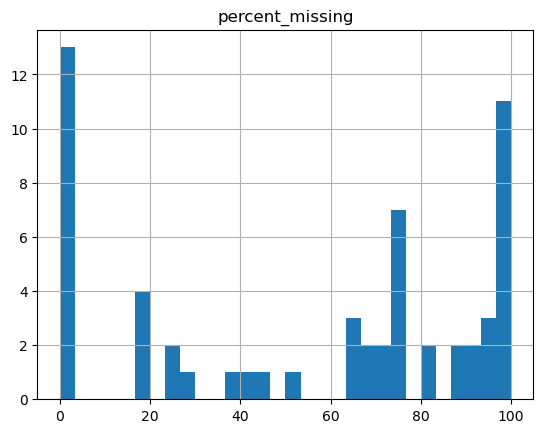

In [59]:
hist = missing_value_df.hist(bins=30)

In [60]:
result_q3d = 16

In [62]:

grading_util.save_results("result_3c", missing_value_df);

important_attribute_business_df = business_df[['_id', 'business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'categories', 'attributes.WiFi',
'attributes.BikeParking',	
'attributes.BusinessParking',	
'attributes.BusinessAcceptsCreditCards',	
'attributes.RestaurantsReservations',
'attributes.WheelchairAccessible',                                               
'attributes.Caters',
'attributes.OutdoorSeating',
'attributes.RestaurantsGoodForGroups',
'attributes.RestaurantsPriceRange2',
'attributes.Ambience',
'attributes.HasTV',
'attributes.Alcohol',
'attributes.RestaurantsTakeOut',
'attributes.NoiseLevel',
'attributes.RestaurantsAttire',
'attributes.RestaurantsDelivery',
'hours.Monday',
'hours.Tuesday',
'hours.Wednesday',
'hours.Thursday',
'hours.Friday',
'hours.Saturday',
'hours.Sunday',
'attributes.GoodForKids',
'attributes.ByAppointmentOnly'
 ]]
important_attribute_business_df.head()

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,attributes.RestaurantsDelivery,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,attributes.GoodForKids,attributes.ByAppointmentOnly
0,6737c377ed849dc4d5aec165,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,...,None,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,NaN,NaN
1,6737c377ed849dc4d5aec166,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,...,False,5:0-18:0,5:0-17:0,5:0-18:0,5:0-18:0,5:0-18:0,5:0-18:0,5:0-18:0,True,False
2,6737c377ed849dc4d5aec167,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,...,NaN,NaN,NaN,NaN,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,NaN,False
3,6737c377ed849dc4d5aec168,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
4,6737c377ed849dc4d5aec169,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,...,NaN,16:0-19:0,16:0-19:0,16:0-19:0,16:0-19:0,16:0-19:0,9:0-11:0,NaN,False,NaN


In [65]:
q3fi = 'A'

In [66]:
grader.check("q3fi")

q3fi results: All test cases passed!

In [71]:
#
if 'categories_text' not in business.index_information():
    business.create_index([('categories', TEXT)])

q4a_cursor = business.find({ '$text': { '$search': "Restaurants"},  'attributes.RestaurantsGoodForGroups' : {'$exists': False}})
q4a = len(list(q4a_cursor))

In [72]:

grading_util.save_results("result_4a", q4a)[0]

8237

Text search and category logic to answer specific restaurant questions. Using MongoDB and aggregation pipelines only.

In [77]:
q4b_cursor =  business.aggregate([{'$match': { '$text': { '$search': "Restaurants"}}}, 
                              
                              {'$match': {
                                  'hours.Friday': {'$exists': True}
                              }}, 
                                    
                               {'$set': {'startingHourFriday':  {'$toInt':{'$arrayElemAt': [{'$split':[{ '$arrayElemAt': [{'$split': ['$hours.Friday', '-']}, 0]}, ':']}, 0]}}

                                        }},
                                    
                                    {'$match': {'$or': [
                                        {'startingHourFriday': {'$eq': 17}},
                                        {'startingHourFriday': {'$eq': 18}}
                                     ]}}
                                    ])




q4b = len(list(q4b_cursor))

In [84]:
q4c_pipeline = [ {'$match': { '$text': { '$search': "Restaurants"}}},
                                      

                                        {'$set': {
                                            'all_categories':{'$split': ['$categories', ', ']}
                                        }},
                                        
                                             { '$unwind': '$all_categories'},
                                        
                                        {'$project': {
                                        '_id': 1, 
                                        'name': 1, 
                                        'category': '$all_categories'
                                                }},
                                        
                                    {'$sort': {
                                        'name': 1, 
                                        'category' : 1}}

    
]
result_4c = list(business.aggregate(q4c_pipeline))

In [85]:
result_4c[:5]

[{'_id': ObjectId('6737c37ced849dc4d5aef77c'),
  'name': " Gruby's New York Deli",
  'category': 'Caterers'},
 {'_id': ObjectId('6737c37ced849dc4d5aef77c'),
  'name': " Gruby's New York Deli",
  'category': 'Delis'},
 {'_id': ObjectId('6737c37ced849dc4d5aef77c'),
  'name': " Gruby's New York Deli",
  'category': 'Event Planning & Services'},
 {'_id': ObjectId('6737c37ced849dc4d5aef77c'),
  'name': " Gruby's New York Deli",
  'category': 'Kosher'},
 {'_id': ObjectId('6737c37ced849dc4d5aef77c'),
  'name': " Gruby's New York Deli",
  'category': 'Restaurants'}]

In [203]:
q4d_pipeline = [{'$match': { '$text': { '$search': "Restaurants"}}},
                                      

                                        {'$set': {
                                            'all_categories':{'$split': ['$categories', ', ']}
                                        }},
                                        
                                             { '$unwind': '$all_categories'},
                                        
                                        {'$project': {
                                        '_id': 1, 
                                        'name': 1, 
                                        'category': '$all_categories'
                                                }},
                                        
                                    {'$sort': {
                                        'name': 1, 
                                        'category' : 1}}] 

extra_stage = {'$match': {'category': 'Vegetarian'}}
q4d_pipeline.append(extra_stage)

result_4d = list(business.aggregate(q4d_pipeline))

veg_count = len(result_4d)

In [204]:

grading_util.save_results("result_4d", veg_count)[0]

1482